In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("loan_prediction.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
df['Loan_Amount_Term'].nunique()

10

In [8]:
df['Dependents'].nunique()

4

In [9]:
df['LoanAmount'].nunique()

203

In [10]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [11]:
# filling above columns null values with mode
for col in columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

NameError: name 'columns' is not defined

In [12]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

In [14]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
# dropping unnecessary columns
df.drop(['Loan_ID'],axis=1,inplace=True)

In [16]:
df.shape

(614, 12)

In [17]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,84.037468,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.250000,360.00000,1.000000
50%,3812.500000,1188.500000,129.000000,360.00000,1.000000
75%,5795.000000,2297.250000,164.750000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [18]:
sns.countplot(df['Loan_Status'])

ValueError: could not convert string to float: 'Y'

In [19]:
import matplotlib.pyplot as plt

In [20]:
dfcorr=df.corr()

<Axes: >

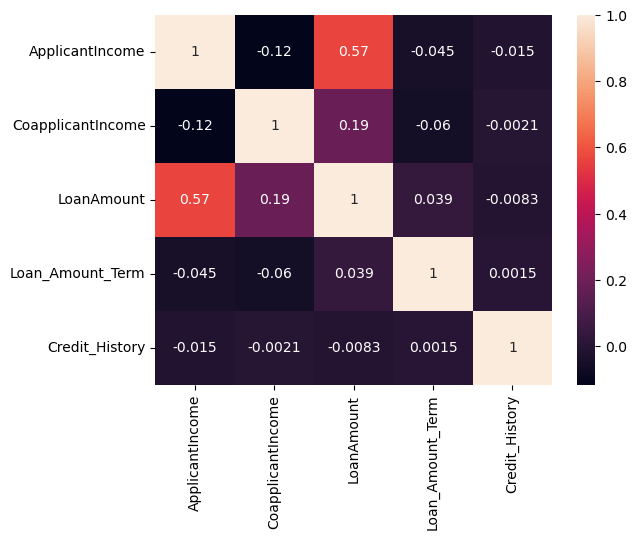

In [21]:

sns.heatmap(dfcorr,annot=True)

In [22]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


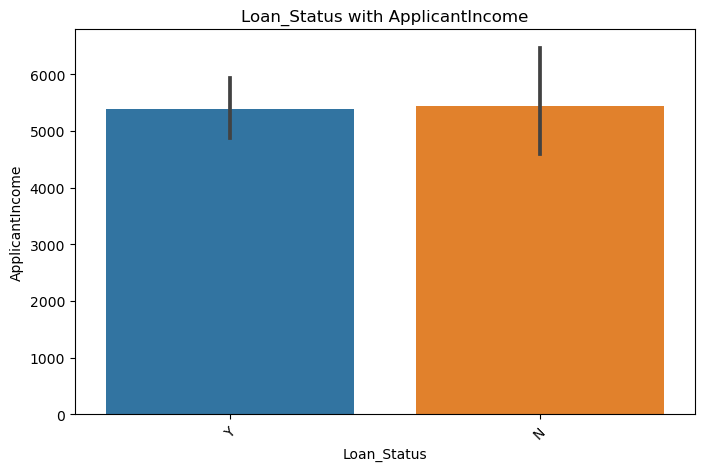

In [23]:
plt.figure(figsize=(8,5))
sns.barplot(y='ApplicantIncome',x='Loan_Status',data=df)
plt.title("Loan_Status with ApplicantIncome")
plt.xticks(rotation=45)
plt.show()

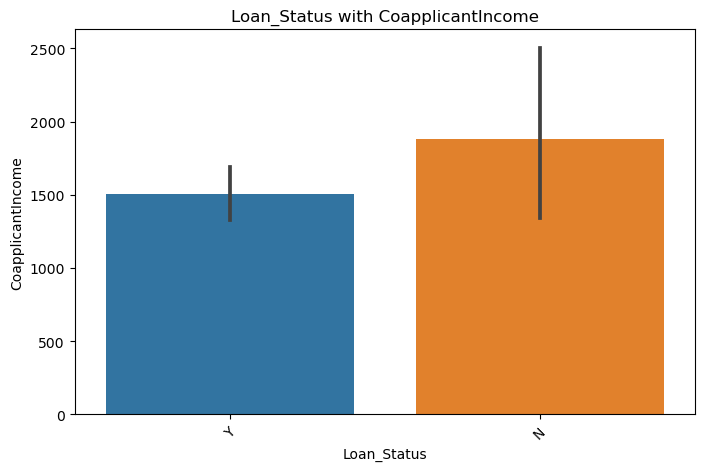

In [24]:
plt.figure(figsize=(8,5))
sns.barplot(y='CoapplicantIncome',x='Loan_Status',data=df)
plt.title("Loan_Status with CoapplicantIncome")
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='Property_Area', ylabel='count'>

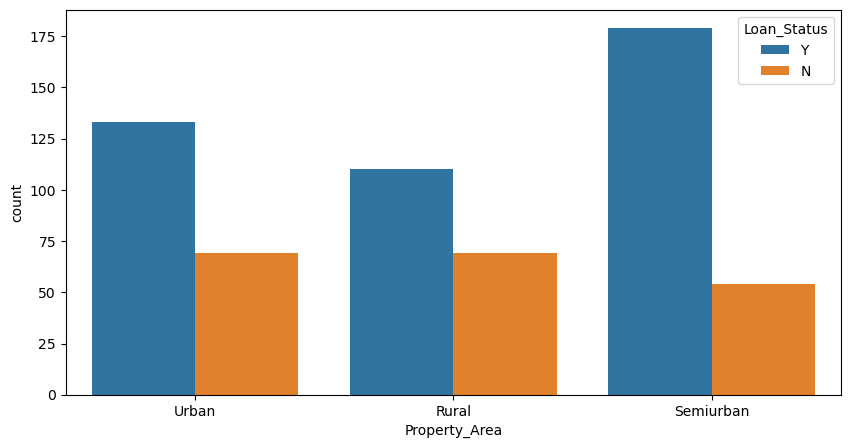

In [25]:
plt.figure(figsize=(10,5))
sns.countplot(x='Property_Area',hue='Loan_Status',data=df)

<Axes: xlabel='Credit_History', ylabel='count'>

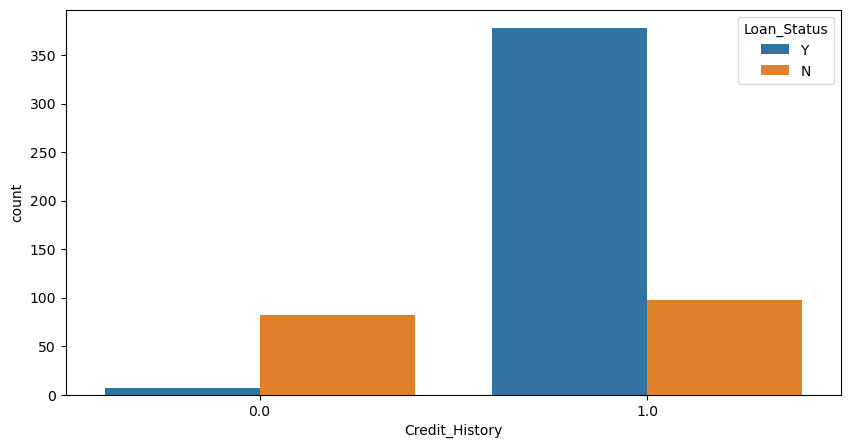

In [26]:
plt.figure(figsize=(10,5))
sns.countplot(x='Credit_History',hue='Loan_Status',data=df)

<Axes: xlabel='Loan_Amount_Term', ylabel='count'>

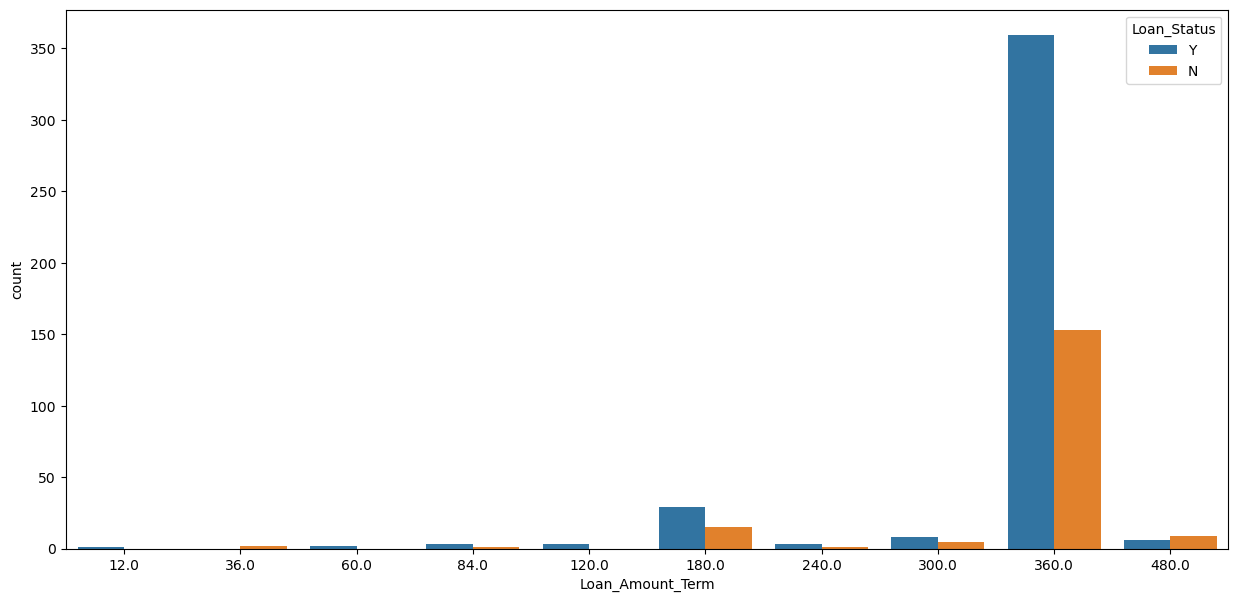

In [27]:
plt.figure(figsize=(15,7))
sns.countplot(x='Loan_Amount_Term',hue='Loan_Status',data=df)

<Axes: xlabel='Self_Employed', ylabel='count'>

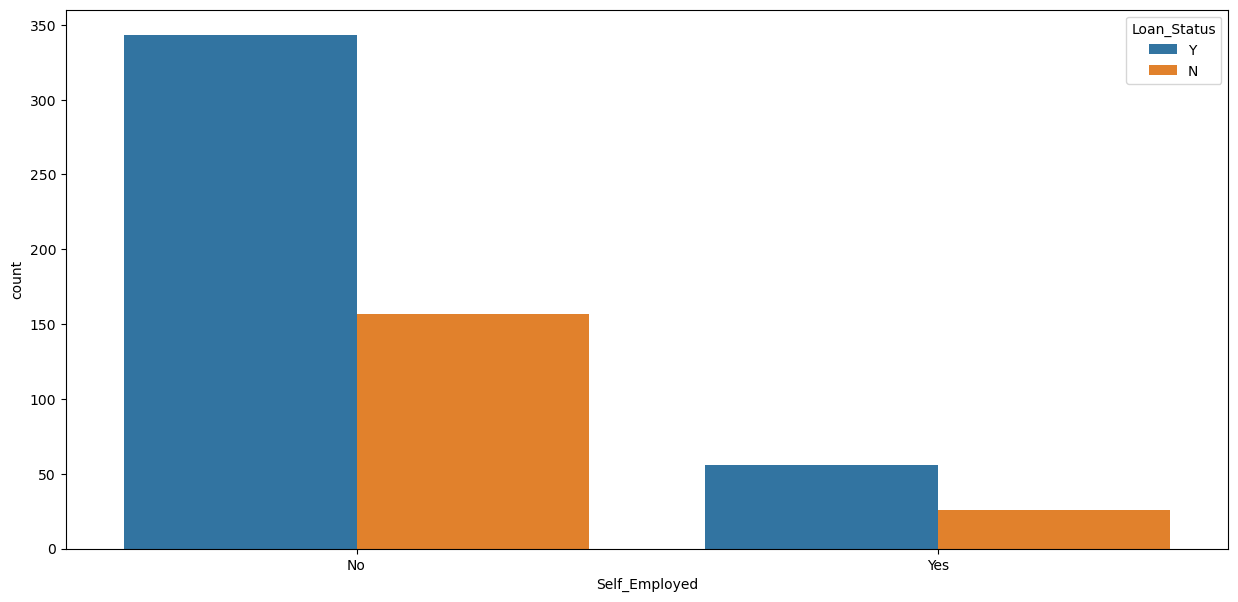

In [28]:
plt.figure(figsize=(15,7))
sns.countplot(x='Self_Employed',hue='Loan_Status',data=df)

<Axes: xlabel='Education', ylabel='count'>

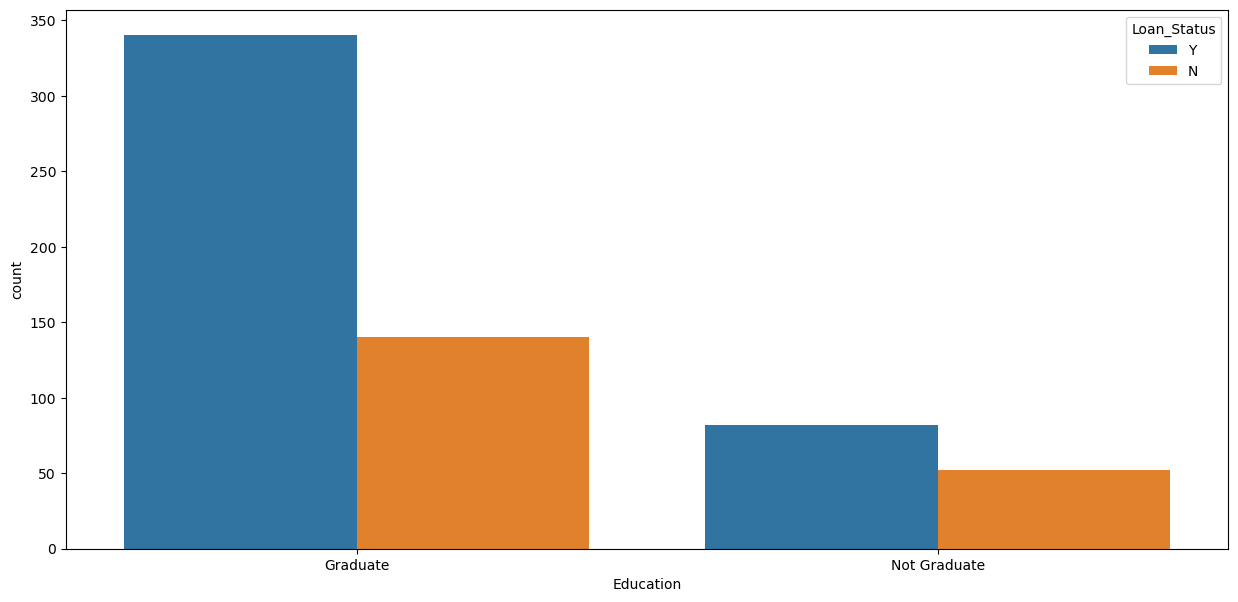

In [29]:
plt.figure(figsize=(15,7))
sns.countplot(x='Education',hue='Loan_Status',data=df)

<Axes: xlabel='Dependents', ylabel='count'>

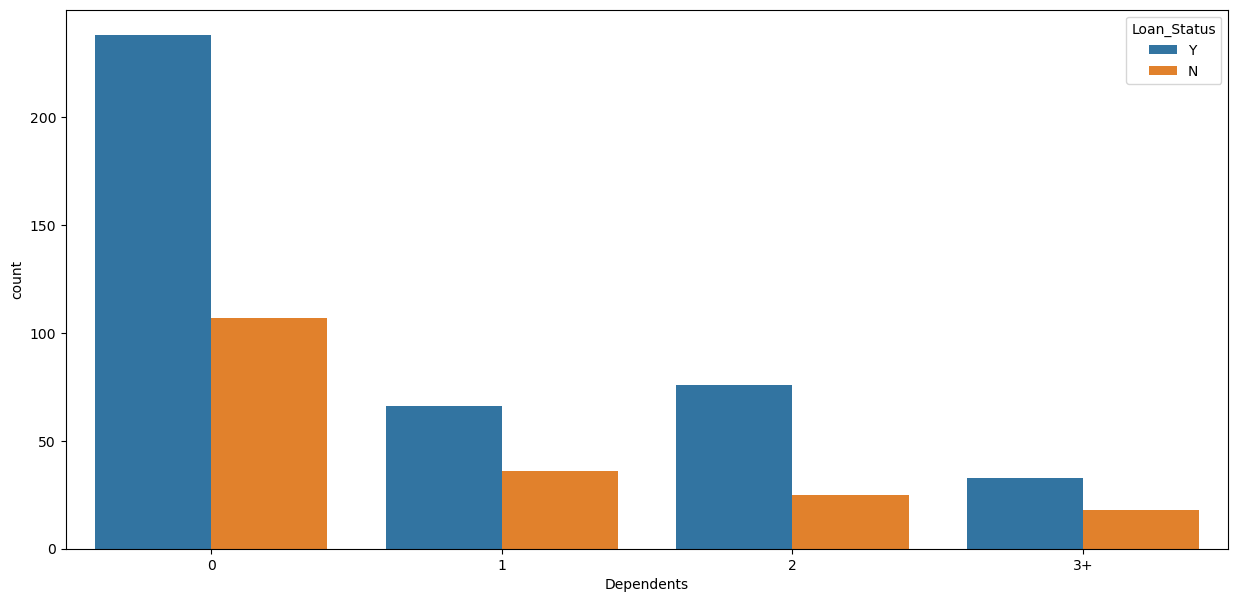

In [30]:
plt.figure(figsize=(15,7))
sns.countplot(x='Dependents',hue='Loan_Status',data=df)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Gender             614 non-null    int32
 1   Married            614 non-null    int32
 2   Dependents         614 non-null    int32
 3   Education          614 non-null    int32
 4   Self_Employed      614 non-null    int32
 5   ApplicantIncome    614 non-null    int64
 6   CoapplicantIncome  614 non-null    int64
 7   LoanAmount         614 non-null    int64
 8   Loan_Amount_Term   614 non-null    int64
 9   Credit_History     614 non-null    int64
 10  Property_Area      614 non-null    int32
 11  Loan_Status        614 non-null    int32
dtypes: int32(7), int64(5)
memory usage: 40.9 KB


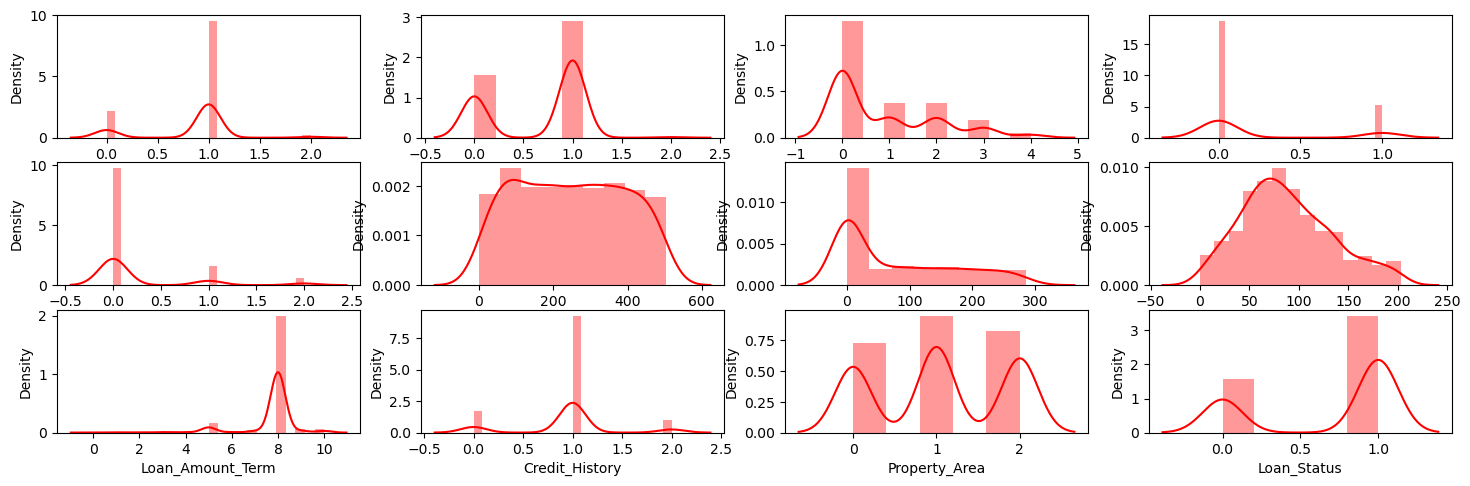

In [35]:
plt.figure(figsize=(18,15))
for i in enumerate(df.columns):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(df[i[1]],color='r')

In [36]:
df.skew()

Gender              -0.953015
Married             -0.538097
Dependents           1.089068
Education            1.367622
Self_Employed        2.191118
ApplicantIncome      0.040993
CoapplicantIncome    0.780870
LoanAmount           0.458715
Loan_Amount_Term    -2.819192
Credit_History      -0.199751
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [37]:
from sklearn.preprocessing import power_transform

df[['CoapplicantIncome']]=power_transform(df[['CoapplicantIncome']],method='yeo-johnson')

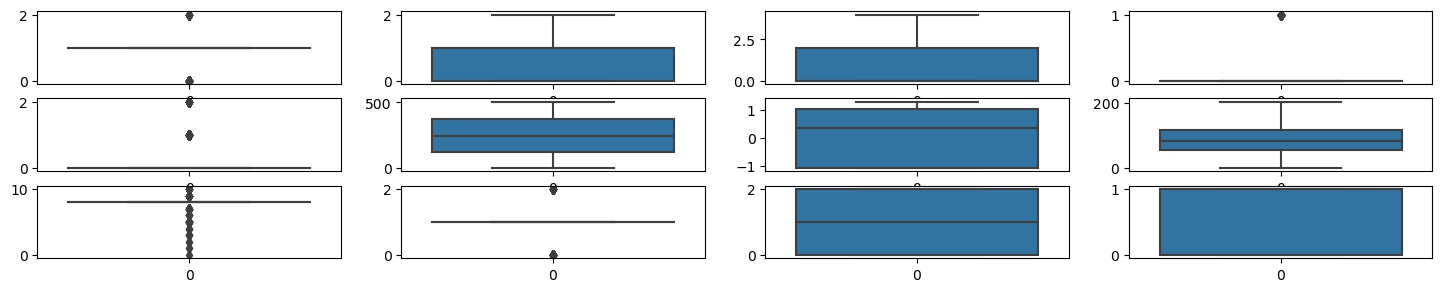

In [38]:
plt.figure(figsize=(18,10))
for o in enumerate(df):
    plt.subplot(9,4,o[0]+1)
    sns.boxplot(df[o[1]])

In [39]:
df_1=df[(z<3).all(axis=1)]
print("with outliers::",df.shape)
print("After removing outliers::",df_1.shape)

NameError: name 'z' is not defined

In [40]:
from scipy import stats 
IQR = stats.iqr(df) 
IQR

3.0

In [41]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

(206, 12)


In [42]:
x=df.drop(['Loan_Status'],axis=1)
y=df['Loan_Status']

In [43]:
x.shape

(614, 11)

In [44]:
y.shape

(614,)

In [45]:
from sklearn.preprocessing import MinMaxScaler

sc=MinMaxScaler()
x=sc.fit_transform(x)

In [46]:
pd.DataFrame(x).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

In [47]:
pd.DataFrame(x).describe()

,0,1,2,3,4,5,6,7,8,9,10
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.419381,0.328990,0.210505,0.218241,0.118893,0.490312,0.456480,0.432118,0.771336,0.468241,0.518730
std,0.210876,0.242486,0.280133,0.413389,0.267368,0.284797,0.425818,0.224976,0.116190,0.235962,0.393741
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.000000,0.000000,0.000000,0.000000,0.238591,0.000000,0.262315,0.800000,0.500000,0.000000
50%,0.500000,0.500000,0.000000,0.000000,0.000000,0.485119,0.608260,0.403941,0.800000,0.500000,0.500000
75%,0.500000,0.500000,0.500000,0.000000,0.000000,0.733631,0.883545,0.575123,0.800000,0.500000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: xlabel='Loan_Status', ylabel='count'>

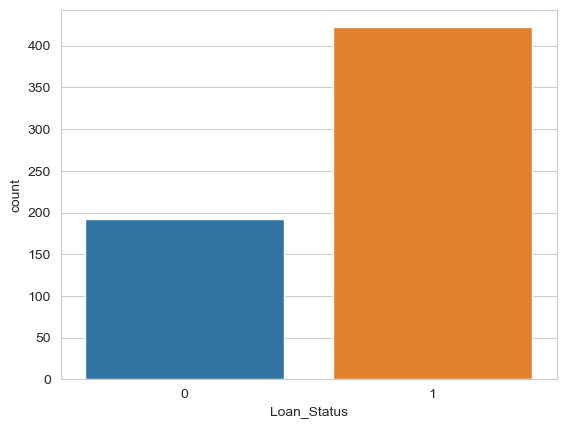

In [48]:
sns.set_style("whitegrid")
sns.countplot(x="Loan_Status", data=df)

In [49]:
from imblearn.over_sampling import BorderlineSMOTE
x_rus, y_rus =BorderlineSMOTE().fit_resample(x, y)
print('original  Target dataset shape:',y.shape)
print('Resample Target dataset shape',y_rus.shape)

original  Target dataset shape: (614,)
Resample Target dataset shape (844,)


<Axes: ylabel='count'>

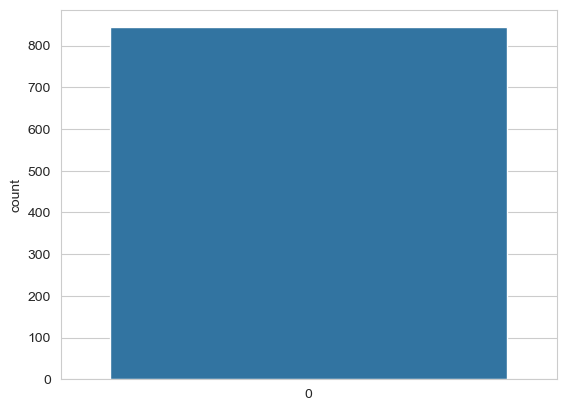

In [50]:
sns.set_style("whitegrid")
sns.countplot(y_rus)

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x_rus,y_rus,test_size=.27,random_state=42)

In [53]:
x_train.shape

(616, 11)

In [54]:
x_test.shape

(228, 11)

In [55]:
y_train.shape

(616,)

In [56]:
y_test.shape

(228,)

In [57]:
#Importing necessary libraries

from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import warnings
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')

In [58]:
logreg=LogisticRegression()
logreg_score=cross_val_score(logreg,x_rus,y_rus,cv=4,scoring='accuracy')
print("cross validation score:",np.mean(logreg_score))

cross validation score: 0.6800947867298578


In [59]:
logreg.fit(x_train,y_train)
LR_predicted=logreg.predict(x_test)

print(accuracy_score(y_test,LR_predicted))
print(confusion_matrix(y_test,LR_predicted))
print(classification_report(y_test,LR_predicted))
print("Training accuracy::",logreg.score(x_train,y_train))
print("Test accuracy::",logreg.score(x_test,y_test))

0.6622807017543859
[[66 57]
 [20 85]]
              precision    recall  f1-score   support

           0       0.77      0.54      0.63       123
           1       0.60      0.81      0.69       105

    accuracy                           0.66       228
   macro avg       0.68      0.67      0.66       228
weighted avg       0.69      0.66      0.66       228

Training accuracy:: 0.6996753246753247
Test accuracy:: 0.6622807017543859


In [60]:
dtc=DecisionTreeClassifier()
dtc_score=cross_val_score(dtc,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score for svm:",np.mean(dtc_score))

cross validation score for svm: 0.7643138912369681


In [61]:
dtc.fit(x_train,y_train)
predicted_dtc=dtc.predict(x_test)
print(accuracy_score(y_test,predicted_dtc))
print(confusion_matrix(y_test,predicted_dtc))
print(classification_report(y_test,predicted_dtc))
print("Training accuracy::",dtc.score(x_train,y_train))
print("Test accuracy::",dtc.score(x_test,y_test))

0.75
[[89 34]
 [23 82]]
              precision    recall  f1-score   support

           0       0.79      0.72      0.76       123
           1       0.71      0.78      0.74       105

    accuracy                           0.75       228
   macro avg       0.75      0.75      0.75       228
weighted avg       0.75      0.75      0.75       228

Training accuracy:: 1.0
Test accuracy:: 0.75


In [62]:
knn=KNeighborsClassifier()
knn_score=cross_val_score(knn,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score for knn:",np.mean(knn_score))

cross validation score for knn: 0.7642857142857142


In [63]:
knn.fit(x_train,y_train)
predicted_knn=knn.predict(x_test)
print(accuracy_score(y_test,predicted_knn))
print(confusion_matrix(y_test,predicted_knn))
print(classification_report(y_test,predicted_knn))
print("Training accuracy::",knn.score(x_train,y_train))
print("Test accuracy::",knn.score(x_test,y_test))

0.7412280701754386
[[90 33]
 [26 79]]
              precision    recall  f1-score   support

           0       0.78      0.73      0.75       123
           1       0.71      0.75      0.73       105

    accuracy                           0.74       228
   macro avg       0.74      0.74      0.74       228
weighted avg       0.74      0.74      0.74       228

Training accuracy:: 0.8474025974025974
Test accuracy:: 0.7412280701754386


In [64]:
rfc=RandomForestClassifier()
rfc_score=cross_val_score(rfc,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score for rfc:",np.mean(rfc_score))

cross validation score for rfc: 0.8318399549168781


In [65]:
rfc.fit(x_train,y_train)
predicted_rfc=rfc.predict(x_test)
print(accuracy_score(y_test,predicted_rfc))
print(confusion_matrix(y_test,predicted_rfc))
print(classification_report(y_test,predicted_rfc))
print("Training accuracy::",rfc.score(x_train,y_train))
print("Test accuracy::",rfc.score(x_test,y_test))

0.8026315789473685
[[90 33]
 [12 93]]
              precision    recall  f1-score   support

           0       0.88      0.73      0.80       123
           1       0.74      0.89      0.81       105

    accuracy                           0.80       228
   macro avg       0.81      0.81      0.80       228
weighted avg       0.82      0.80      0.80       228

Training accuracy:: 1.0
Test accuracy:: 0.8026315789473685


In [66]:
adb=AdaBoostClassifier()
adb_score=cross_val_score(adb,x_rus,y_rus,cv=10,scoring='accuracy')
print("cross validation score for Ada boost:",np.mean(adb_score))

cross validation score for Ada boost: 0.7811484593837534


In [67]:
adb.fit(x_train,y_train)
predicted_adb=adb.predict(x_test)
print(accuracy_score(y_test,predicted_adb))
print(confusion_matrix(y_test,predicted_adb))
print(classification_report(y_test,predicted_adb))
print("Training accuracy::",adb.score(x_train,y_train))
print("Test accuracy::",adb.score(x_test,y_test))

0.7412280701754386
[[76 47]
 [12 93]]
              precision    recall  f1-score   support

           0       0.86      0.62      0.72       123
           1       0.66      0.89      0.76       105

    accuracy                           0.74       228
   macro avg       0.76      0.75      0.74       228
weighted avg       0.77      0.74      0.74       228

Training accuracy:: 0.8327922077922078
Test accuracy:: 0.7412280701754386


In [68]:
bgc=BaggingClassifier()
bgc_score=cross_val_score(bgc,x_rus,y_rus,cv=10,scoring='accuracy')
print("cross validation score for BAGGING Classifier:",np.mean(bgc_score))

cross validation score for BAGGING Classifier: 0.7846078431372548


In [69]:
bgc.fit(x_train,y_train)
predicted_bgc=bgc.predict(x_test)
print(accuracy_score(y_test,predicted_bgc))
print(confusion_matrix(y_test,predicted_bgc))
print(classification_report(y_test,predicted_bgc))
print("Training accuracy::",bgc.score(x_train,y_train))
print("Test accuracy::",bgc.score(x_test,y_test))

0.7850877192982456
[[92 31]
 [18 87]]
              precision    recall  f1-score   support

           0       0.84      0.75      0.79       123
           1       0.74      0.83      0.78       105

    accuracy                           0.79       228
   macro avg       0.79      0.79      0.78       228
weighted avg       0.79      0.79      0.79       228

Training accuracy:: 0.9983766233766234
Test accuracy:: 0.7850877192982456


In [70]:
grbc=GradientBoostingClassifier()
grbc_score=cross_val_score(grbc,x_rus,y_rus,cv=10,scoring='accuracy')
print("cross validation score for Gradient Boosting Classifier:",np.mean(grbc_score))

cross validation score for Gradient Boosting Classifier: 0.7919047619047619


In [71]:
grbc.fit(x_train,y_train)
predicted_grbc=grbc.predict(x_test)
print(accuracy_score(y_test,predicted_grbc))
print(confusion_matrix(y_test,predicted_grbc))
print(classification_report(y_test,predicted_grbc))
print("Training accuracy::",grbc.score(x_train,y_train))
print("Test accuracy::",grbc.score(x_test,y_test))

0.7982456140350878
[[87 36]
 [10 95]]
              precision    recall  f1-score   support

           0       0.90      0.71      0.79       123
           1       0.73      0.90      0.81       105

    accuracy                           0.80       228
   macro avg       0.81      0.81      0.80       228
weighted avg       0.82      0.80      0.80       228

Training accuracy:: 0.922077922077922
Test accuracy:: 0.7982456140350878


In [72]:
grbc=GradientBoostingClassifier()
param_grid={
    'criterion' : ['mse', 'mae'],
    'n_estimators':[100,200,50],
    'learning_rate':[0.1,0.5],
     'loss':['deviance', 'exponential']              
}

In [73]:
grbc_grid=GridSearchCV(GradientBoostingClassifier(),param_grid,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)

In [74]:
grbc_grid.fit(x_train,y_train)
grbc_pred=grbc_grid.best_estimator_.predict(x_test)
print("Accuracy after parameter tuning::",accuracy_score(y_test,grbc_pred))

Fitting 4 folds for each of 24 candidates, totalling 96 fits


ValueError: 
All the 96 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
48 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Abhimanyu Singh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Abhimanyu Singh\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 420, in fit
    self._validate_params()
  File "C:\Users\Abhimanyu Singh\anaconda3\lib\site-packages\sklearn\base.py", line 581, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Abhimanyu Singh\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py", line 97, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'criterion' parameter of GradientBoostingClassifier must be a str among {'friedman_mse', 'squared_error'}. Got 'mse' instead.

--------------------------------------------------------------------------------
48 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Abhimanyu Singh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Abhimanyu Singh\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 420, in fit
    self._validate_params()
  File "C:\Users\Abhimanyu Singh\anaconda3\lib\site-packages\sklearn\base.py", line 581, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Abhimanyu Singh\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py", line 97, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'criterion' parameter of GradientBoostingClassifier must be a str among {'friedman_mse', 'squared_error'}. Got 'mae' instead.


In [75]:
grbc_grid.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [76]:
best_param={
    'criterion' : ['mse'],
    'n_estimators':[100],
    'learning_rate':[0.1],
     'loss':['deviance']
}

In [77]:
best_grbc_grid=GridSearchCV(GradientBoostingClassifier(),best_param,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)

In [78]:
best_grbc_grid.fit(x_train,y_train)
best_grbc_pred=best_grbc_grid.best_estimator_.predict(x_test)
print("Accuracy after parameter tuning::",accuracy_score(y_test,best_grbc_pred))

Fitting 4 folds for each of 1 candidates, totalling 4 fits


ValueError: 
All the 4 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Abhimanyu Singh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Abhimanyu Singh\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 420, in fit
    self._validate_params()
  File "C:\Users\Abhimanyu Singh\anaconda3\lib\site-packages\sklearn\base.py", line 581, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Abhimanyu Singh\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py", line 97, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'criterion' parameter of GradientBoostingClassifier must be a str among {'friedman_mse', 'squared_error'}. Got 'mse' instead.


In [79]:
print("CLASSIFICATION REPORT::\n",classification_report(y_test,best_grbc_pred))

NameError: name 'best_grbc_pred' is not defined

In [80]:
clsf_repo = classification_report(y_test,best_grbc_pred,output_dict=True)
sns.heatmap(pd.DataFrame(clsf_repo).T, annot=True)

NameError: name 'best_grbc_pred' is not defined

In [81]:
from sklearn.metrics import roc_auc_score

In [82]:
print("roc auc score::",roc_auc_score(y_test, best_grbc_pred))

NameError: name 'best_grbc_pred' is not defined

In [83]:
from sklearn.metrics import roc_curve

In [84]:
fpr1, tpr1, thresh1 = roc_curve(y_test, best_grbc_pred, pos_label=1)

NameError: name 'best_grbc_pred' is not defined

In [85]:
#plotting ROC CURVE
sns.set_theme(style="darkgrid")
plt.plot(fpr1, tpr1, linestyle='--',color='red', label='GradientBoostingClassifier')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

NameError: name 'fpr1' is not defined

In [86]:
import joblib

In [87]:
joblib.dump(best_grbc_grid.best_estimator_,'Loan Application Status_Prediction.obj')

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'